<a href="https://colab.research.google.com/github/cres17/2025_NLP/blob/main/%EB%9D%BC%EB%B2%A8%EA%B0%92_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     !sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

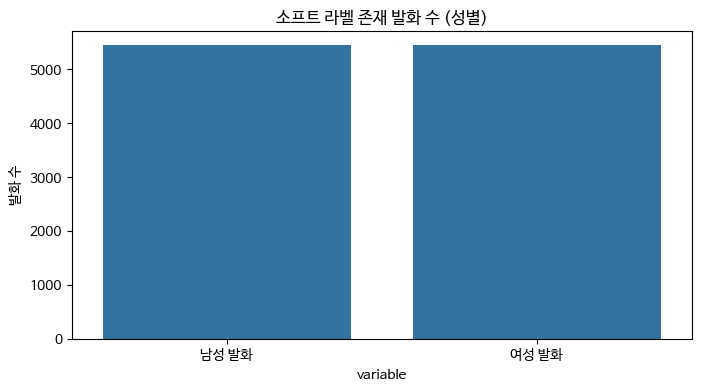

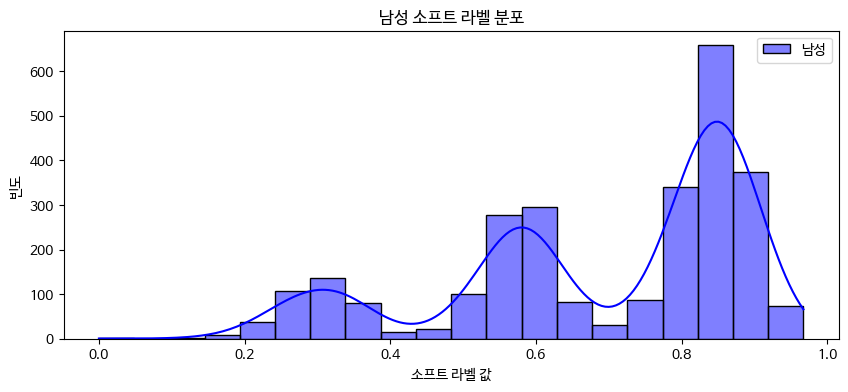

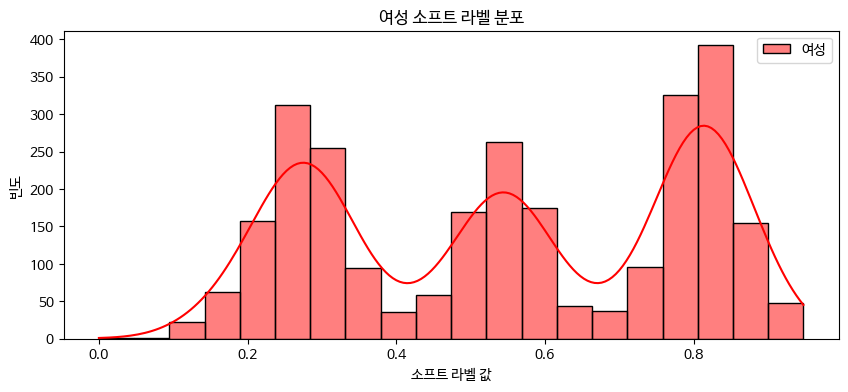

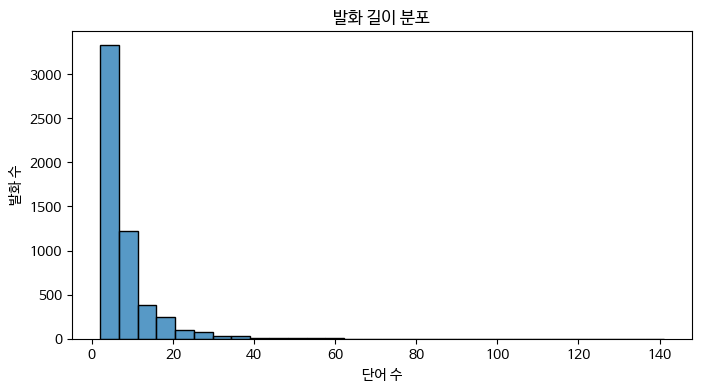

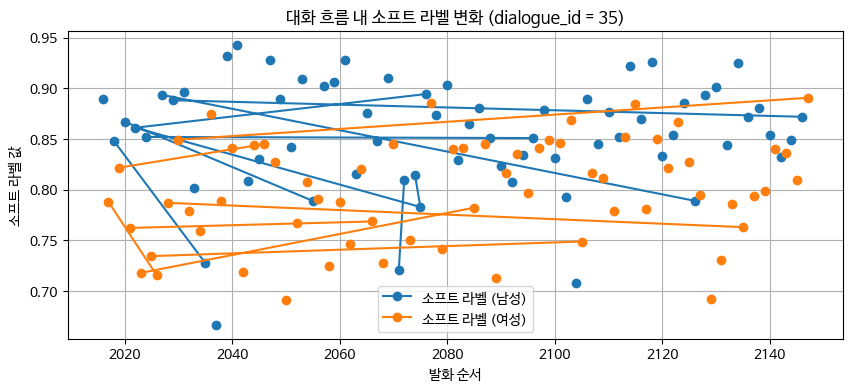

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ✅ 파일 경로 (Colab에 업로드된 경우 수정 필요)
file_path = "dialogues_with_soft_labels.jsonl"

# ✅ 데이터 로드
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# ✅ 발화자 및 라벨 존재 여부 기반 컬럼 생성
df['has_male_label'] = df['soft_label_male'].notnull()
df['has_female_label'] = df['soft_label_female'].notnull()

# ✅ 발화 길이 계산
df['utterance_length'] = df['text'].apply(lambda x: len(x.split()))

# ✅ 시각화 1: 성별 라벨 분포
plt.figure(figsize=(8, 4))
sns.countplot(data=df.melt(value_vars=['has_male_label', 'has_female_label']), x='variable')
plt.title("소프트 라벨 존재 발화 수 (성별)")
plt.xticks([0, 1], ['남성 발화', '여성 발화'])
plt.ylabel("발화 수")
plt.show()


# ✅ 시각화 2: 소프트 라벨 히스토그램
plt.figure(figsize=(10, 4))
sns.histplot(df['soft_label_male'].dropna(), color='blue', kde=True, label='남성', bins=20)
plt.title("남성 소프트 라벨 분포")
plt.ylabel("빈도")
plt.xlabel("소프트 라벨 값")
plt.legend()
plt.show()


plt.figure(figsize=(10, 4))
sns.histplot(df['soft_label_female'].dropna(), color='red', kde=True, label='여성', bins=20)
plt.title("여성 소프트 라벨 분포")
plt.ylabel("빈도")
plt.xlabel("소프트 라벨 값")
plt.legend()
plt.show()

# ✅ 시각화 3: 발화 길이 분포
plt.figure(figsize=(8, 4))
sns.histplot(df['utterance_length'], bins=30)
plt.title("발화 길이 분포")
plt.xlabel("단어 수")
plt.ylabel("발화 수")
plt.show()

# ✅ 시각화 4: 대화 흐름 내 라벨 변화 (예시로 1개 대화)
example_dialogue_id = df['dialogue_id'].value_counts().idxmax()
example_df = df[df['dialogue_id'] == example_dialogue_id].sort_values(by='utterance_id')

plt.figure(figsize=(10, 4))
plt.plot(example_df['soft_label_male'], label='소프트 라벨 (남성)', marker='o')
plt.plot(example_df['soft_label_female'], label='소프트 라벨 (여성)', marker='o')
plt.title(f"대화 흐름 내 소프트 라벨 변화 (dialogue_id = {example_dialogue_id})")
plt.xlabel("발화 순서")
plt.ylabel("소프트 라벨 값")
plt.legend()
plt.grid(True)
plt.show()

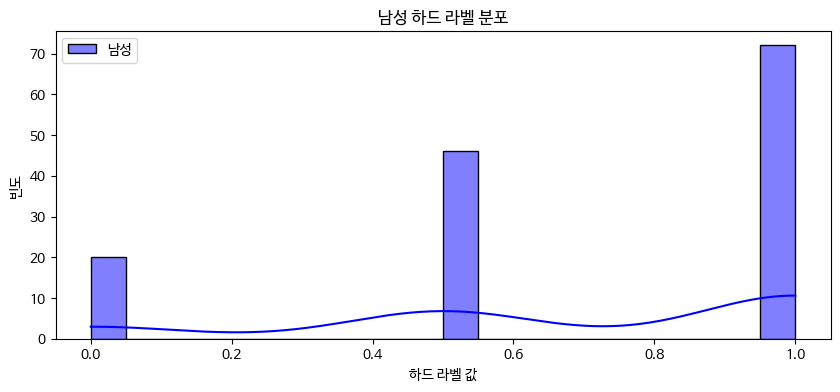

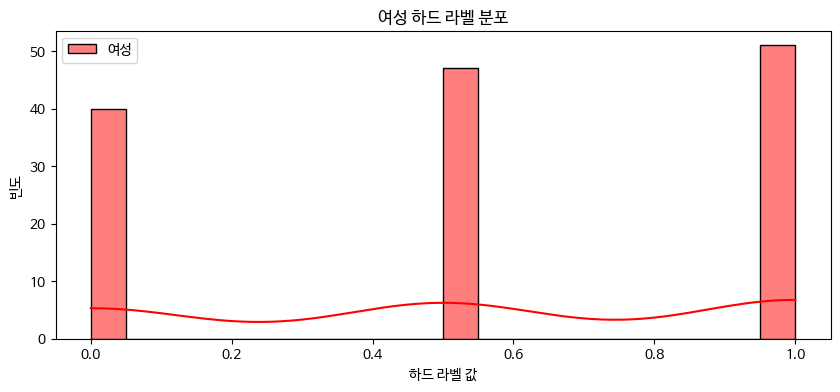

In [ ]:
file_path = "dialogues_human.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

df['has_male_label'] = df['label_male'].notnull()
df['has_female_label'] = df['label_female'].notnull()


plt.figure(figsize=(10, 4))
sns.histplot(df['label_male'].dropna(), color='blue', kde=True, label='남성', bins=20)
plt.title("남성 하드 라벨 분포")
plt.ylabel("빈도")
plt.xlabel("하드 라벨 값")
plt.legend()
plt.show()


plt.figure(figsize=(10, 4))
sns.histplot(df['label_female'].dropna(), color='red', kde=True, label='여성', bins=20)
plt.title("여성 하드 라벨 분포")
plt.ylabel("빈도")
plt.xlabel("하드 라벨 값")
plt.legend()
plt.show()